In [49]:
import pickle
import pandas as pd
import seaborn as sns
from sklearn.linear_model import RidgeCV
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


%matplotlib inline

In [2]:
with open('all_movie_data_cleaned.pkl', 'r') as inpick:
    data = pickle.load(inpick)

In [3]:
data

,budget,distributor,domestic,foreign,genre,rating,release,runtime,adj_release,worldwide_revenue,worldwide_profit
/movies/?id=1000ae.htm,130000000.0,Sony / Columbia,60522097.0,183321030.0,Sci-Fi,PG-13,"May 31, 2013",100.0,2013-05-31,243843127.0,113843127.0
/movies/?id=1952.htm,190000000.0,Buena Vista,93436322.0,115718000.0,Sci-Fi,PG,"May 22, 2015",130.0,2015-05-22,209154322.0,19154322.0
/movies/?id=3burialsofmelquiadesestrada.htm,15000000.0,Sony Classics,5027684.0,4017680.0,Western,R,"December 14, 2005",121.0,2005-12-14,9045364.0,-5954636.0
/movies/?id=40shadesofblue.htm,1500000.0,Vitagraph,75828.0,96741.0,Drama,R,"September 30, 2005",108.0,2005-09-30,172569.0,-1327431.0
/movies/?id=abandon.htm,25000000.0,Paramount,10727683.0,1574536.0,Thriller,PG-13,"October 18, 2002",99.0,2002-10-18,12302219.0,-12697781.0
/movies/?id=abduction11.htm,35000000.0,Lionsgate,28087155.0,54000000.0,Action,PG-13,"September 23, 2011",106.0,2011-09-23,82087155.0,47087155.0
/movies/?id=aboutaboy.htm,30000000.0,Universal,41385278.0,89164177.0,Comedy / Drama,PG-13,"May 17, 2002",100.0,2002-05-17,130549455.0,100549455.0
/movies/?id=aboutlastnight14.htm,12500000.0,Sony / Screen Gems,48637684.0,365000.0,Romantic Comedy,R,"February 14, 2014",100.0,2014-02-14,49002684.0,36502684.0
/movies/?id=aboutschmidt.htm,30000000.0,New Line,65016287.0,40818269.0,Comedy / Drama,R,"December 13, 2002",124.0,2002-12-13,105834556.0,75834556.0
/movies/?id=abrahamlincolnvampirehunter.htm,69000000.0,Fox,37519139.0,78952441.0,Horror Thriller,R,"June 22, 2012",105.0,2012-06-22,116471580.0,47471580.0


In [4]:
model_cols = ['budget', 'runtime', 'worldwide_profit']

In [5]:
model_df = data[model_cols]

In [6]:
model_df.head()

,budget,runtime,worldwide_profit
/movies/?id=1000ae.htm,130000000.0,100.0,113843127.0
/movies/?id=1952.htm,190000000.0,130.0,19154322.0
/movies/?id=3burialsofmelquiadesestrada.htm,15000000.0,121.0,-5954636.0
/movies/?id=40shadesofblue.htm,1500000.0,108.0,-1327431.0
/movies/?id=abandon.htm,25000000.0,99.0,-12697781.0


In [7]:
model_df.corr()

,budget,runtime,worldwide_profit
budget,1.000000,0.318082,0.544651
runtime,0.318082,1.000000,0.273940
worldwide_profit,0.544651,0.273940,1.000000


/Users/benjaminstraate/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


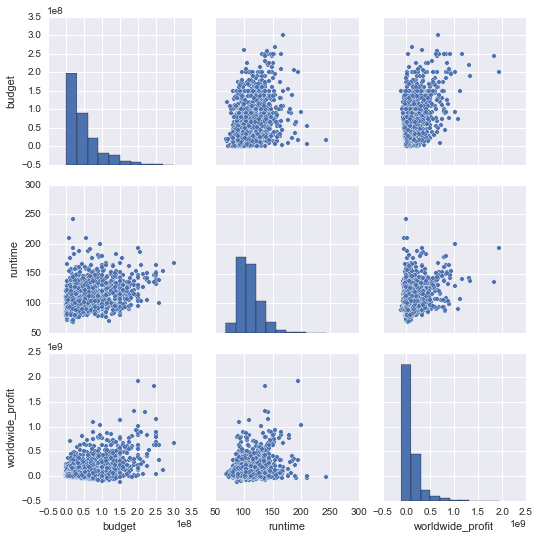

In [8]:
sns.pairplot(model_df)

In [9]:
lm1 = smf.ols('worldwide_profit ~ budget + runtime', data=model_df)
# Fit the model
fit1 = lm1.fit()
# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       worldwide_profit   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     484.3
Date:                Wed, 10 Aug 2016   Prob (F-statistic):          1.01e-174
Time:                        12:12:16   Log-Likelihood:                -44036.
No. Observations:                2180   AIC:                         8.808e+04
Df Residuals:                    2177   BIC:                         8.810e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1.043e+08   1.82e+07     -5.747      0.000      -1.4e+08 -6.87e+07
budget         1.8773      0.069     27.066      0.000         1.741     2.013
runtime     1.019e+06   1.71e+05      5.957      0.000      6.83e+05  1.35e+06
==============================================================================
Omnibus:                     1247.380   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19798.426
Skew:                           2.366   Prob(JB):                         0.00
Kurtosis:                      16.985   Cond. No.                     4.08e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

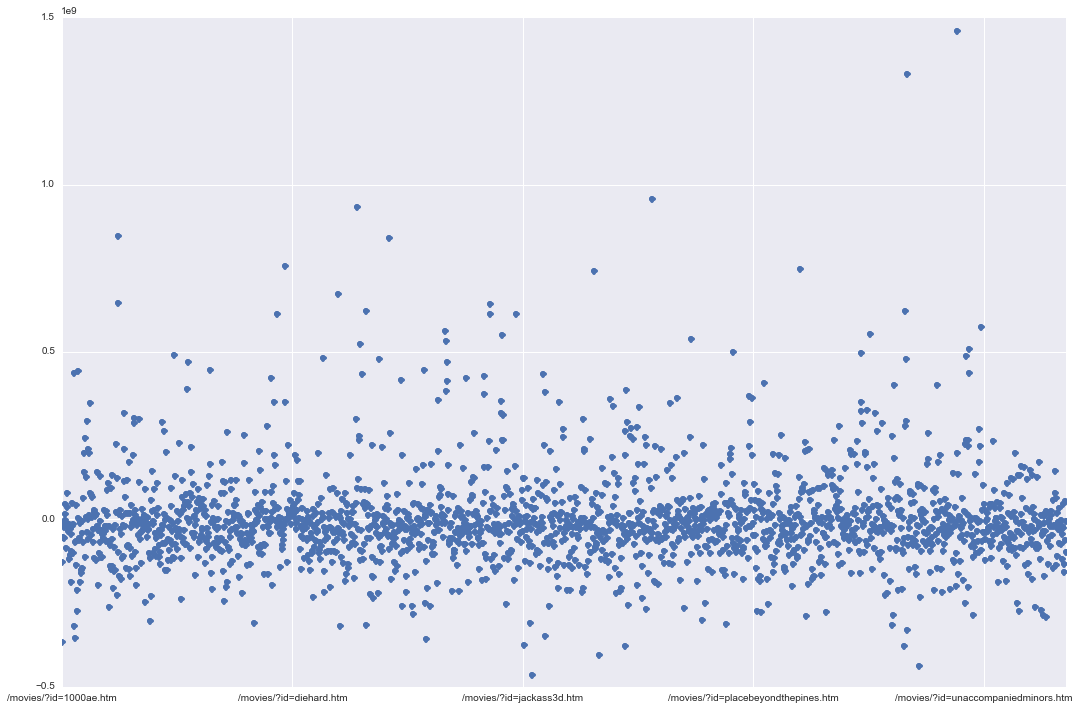

In [10]:
fit1.resid.plot(style='o', figsize=(18,12))

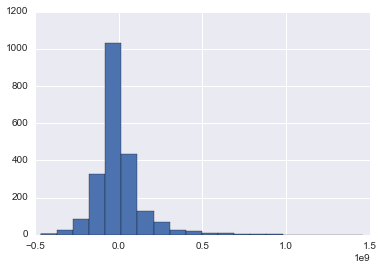

In [11]:
fit1.resid.hist(bins=20)

Using statsmodels we see the residuals are normally distributed and we can explain nearly 31% of the variance predicting worldwide profit given only the budget and runtime. Let's try it with sklearn.

In [12]:
X = model_df[['budget', 'runtime']]
y = model_df['worldwide_profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.32491339316520718

Interestingly we get different r2 values for statsmodels vs. sklearn.  Further investigation reveals statsmodels auto-normalizes where you must pass an argument for Sklearn LinearRegression object.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.33537894515362887

We can improve our model by using some other features.  For the categorical columns we can use dummy variables.

In [36]:
data.head()

,budget,distributor,domestic,foreign,genre,rating,release,runtime,adj_release,worldwide_revenue,worldwide_profit
/movies/?id=1000ae.htm,130000000.0,Sony / Columbia,60522097.0,183321030.0,Sci-Fi,PG-13,"May 31, 2013",100.0,2013-05-31,243843127.0,113843127.0
/movies/?id=1952.htm,190000000.0,Buena Vista,93436322.0,115718000.0,Sci-Fi,PG,"May 22, 2015",130.0,2015-05-22,209154322.0,19154322.0
/movies/?id=3burialsofmelquiadesestrada.htm,15000000.0,Sony Classics,5027684.0,4017680.0,Western,R,"December 14, 2005",121.0,2005-12-14,9045364.0,-5954636.0
/movies/?id=40shadesofblue.htm,1500000.0,Vitagraph,75828.0,96741.0,Drama,R,"September 30, 2005",108.0,2005-09-30,172569.0,-1327431.0
/movies/?id=abandon.htm,25000000.0,Paramount,10727683.0,1574536.0,Thriller,PG-13,"October 18, 2002",99.0,2002-10-18,12302219.0,-12697781.0


In [15]:
rating_dummy_df = pd.get_dummies(data['rating'])

In [16]:
genre_dummy_df = pd.get_dummies(data['genre'])

In [17]:
distrib_dummy_df = pd.get_dummies(data['distributor'])

In [69]:
dummy_df = data.join(rating_dummy_df).join(distrib_dummy_df).join(genre_dummy_df)

In [70]:
dummy_df.head()

,budget,distributor,domestic,foreign,genre,rating,release,runtime,adj_release,worldwide_revenue,...,Sports Action,Sports Comedy,Sports Drama,Thriller,Unknown,War,War Drama,War Romance,Western,Western Comedy
/movies/?id=1000ae.htm,130000000.0,Sony / Columbia,60522097.0,183321030.0,Sci-Fi,PG-13,"May 31, 2013",100.0,2013-05-31,243843127.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
/movies/?id=1952.htm,190000000.0,Buena Vista,93436322.0,115718000.0,Sci-Fi,PG,"May 22, 2015",130.0,2015-05-22,209154322.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
/movies/?id=3burialsofmelquiadesestrada.htm,15000000.0,Sony Classics,5027684.0,4017680.0,Western,R,"December 14, 2005",121.0,2005-12-14,9045364.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
/movies/?id=40shadesofblue.htm,1500000.0,Vitagraph,75828.0,96741.0,Drama,R,"September 30, 2005",108.0,2005-09-30,172569.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
/movies/?id=abandon.htm,25000000.0,Paramount,10727683.0,1574536.0,Thriller,PG-13,"October 18, 2002",99.0,2002-10-18,12302219.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
drop_cols = ['distributor', 'domestic', 'foreign', 'genre', 'rating', 'release', 'adj_release', 'worldwide_revenue', 'worldwide_profit']

In [99]:
X = dummy_df[[col for col in dummy_df.columns if col not in drop_cols]]
y = dummy_df['worldwide_profit']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

-1.9724618994777812e+28

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = Ridge(normalize=True)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.29768892578703054

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = Lasso(normalize=True)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.39224752654511275

Adding dummy variables negatively effects our original model.  However, if we use ridge and lasso we can improve our original model.  Our r2 is now nearly .4 with Lasso.  